# Introduction

=================================================

**Graded Challange 7**

**Name**  : Juan Nembaopit

**Batch** : RMT-040

**URL Dataset**:  Rock Paper Scissors https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors


**Problem**: Mengembangkan sistem pengenalan gerakan tangan untuk permainan interaktif Rock-Paper-Scissors yang dapat digunakan dalam aplikasi pembelajaran atau terapi motorik halus. Sistem ini akan membantu memungkinkan user bermain melawan komputer secara real-time, meningkatkan koordinasi tangan dan mata, juga keterampilan pengambilan keputusan cepat.

**Objective**: Membantu dalam pengembangan aplikasi interaktif berbasis AI.Memberikan pengalaman bermain game yang lebih menarik dengan teknologi pengenalan gambar. embuat model dengan accuracy di atas 90%.

**Justifikasi**:
Permainan Rock-Paper-Scissors berbasis computer vision memiliki potensi besar dalam pembelajaran interaktif dan terapi okupasional. Beberapa studi mendukung efektivitas permainan berbasis gerakan dan integrasi AI dalam pendidikan

Menurut sebuah studi yang diterbitkan dalam jurnal ilmiah, permainan berbasis gerakan dapat meningkatkan fungsi motorik halus pada anak-anak dan orang dewasa dengan gangguan neurologis.

Integrasi teknologi AI dalam permainan tradisional dapat meningkatkan keterlibatan siswa dalam pembelajaran. Menurut laporan EdTech Magazine, "AI-driven adaptive learning solutions improve student interaction and interest by up to 29%".

url:https://pmc.ncbi.nlm.nih.gov/articles/PMC9224824/

url: https://www.thedevmasters.com/ai/how-ai-integration-in-education-increases-student-engagement-by-40

**User**:
Guru sekolah dasar dan menengah untuk kegiatan pembelajaran interaktif. Juga Terapis untuk melatih koordinasi tangan-mata pasien yang sedang dalam physical theraphy.


=================================================

# Import Library

In [ ]:
# Downgrade version of TensorFlow and tf-keras

!pip install -q --upgrade "tensorflow<2.16" "tf-keras<2.16"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 3.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tf-keras>=2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import shutil
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
import pathlib
from sklearn.model_selection import train_test_split
import pickle

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D


In [ ]:
# Check TensorFlow version
print(tf.__version__)

2.15.1


# Data Loading

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juannembaopit","key":"fa7d95810038792511cf1c0b6c12609b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d drgfreeman/rockpaperscissors

Dataset URL: https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors
License(s): CC-BY-SA-4.0


In [ ]:
!unzip rockpaperscissors.zip -d rockpaperscissors

Archive:  rockpaperscissors.zip
  inflating: rockpaperscissors/README_rpc-cv-images.txt  
  inflating: rockpaperscissors/paper/04l5I8TqdzF9WDMJ.png  
  inflating: rockpaperscissors/paper/0Og76sl5CJhbxWWx.png  
  inflating: rockpaperscissors/paper/0RA9rcrv8iVvuDDU.png  
  inflating: rockpaperscissors/paper/0Uomd0HvOB33m47I.png  
  inflating: rockpaperscissors/paper/0a3UtNzl5Ll3sq8K.png  
  inflating: rockpaperscissors/paper/0cb6cVL8pkfi4wF6.png  
  inflating: rockpaperscissors/paper/0eqArS2GgsBeqgSn.png  
  inflating: rockpaperscissors/paper/0t08v9bAaA0mXGCQ.png  
  inflating: rockpaperscissors/paper/0vugygEjxQJPr9yz.png  
  inflating: rockpaperscissors/paper/0zKU6wEhT2cDe9j0.png  
  inflating: rockpaperscissors/paper/14K62H4KG1hg5qiJ.png  
  inflating: rockpaperscissors/paper/1Dfw5FRlS4h60JPX.png  
  inflating: rockpaperscissors/paper/1Frbe8cdOdkciOBg.png  
  inflating: rockpaperscissors/paper/1Tt9U9SzrOm98Xtw.png  
  inflating: rockpaperscissors/paper/1fKclJk4eBWOQSR1.png  
  inflatin

In [ ]:
!unzip -q "/content/rockpaperscissors.zip" -d "/content"

# Create Split Directories
base_dir = '/content/rockpaperscissors_split'
os.makedirs(base_dir, exist_ok=True)

# Create train/val/test directories
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Create Class Subdirectories

def create_class_dirs(root_dir):
    for cls in ['rock', 'paper', 'scissors']:
        os.makedirs(os.path.join(root_dir, cls), exist_ok=True)

create_class_dirs(train_dir)
create_class_dirs(val_dir)
create_class_dirs(test_dir)

# Split Dataset

def split_dataset(src_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    # Verify input directory exists
    if not os.path.exists(src_dir):
        raise FileNotFoundError(f"Source directory {src_dir} not found")

    for class_name in ['rock', 'paper', 'scissors']:
        class_path = os.path.join(src_dir, class_name)

        # Get list of images
        images = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        np.random.shuffle(images)

        # Calculate splits
        train_size = int(len(images) * train_ratio)
        val_size = int(len(images) * val_ratio)

        # Split files
        train_files = images[:train_size]
        val_files = images[train_size:train_size+val_size]
        test_files = images[train_size+val_size:]

        # Copy files
        def copy_files(files, dest_dir):
            for f in files:
                src = os.path.join(class_path, f)
                dst = os.path.join(dest_dir, class_name, f)
                shutil.copy(src, dst)

        copy_files(train_files, train_dir)
        copy_files(val_files, val_dir)
        copy_files(test_files, test_dir)

# Path to original dataset
original_data_dir = '/content/rockpaperscissors/rps-cv-images'

# Execute splitting
split_dataset(original_data_dir)

print("Dataset splitting completed!")
print(f"Train set size: {len(os.listdir(os.path.join(train_dir, 'rock')))} per class")
print(f"Validation set size: {len(os.listdir(os.path.join(val_dir, 'rock')))} per class")
print(f"Test set size: {len(os.listdir(os.path.join(test_dir, 'rock')))} per class")


Dataset splitting completed!
Train set size: 508 per class
Validation set size: 108 per class
Test set size: 110 per class


# Exploratory Data Analysis (EDA)

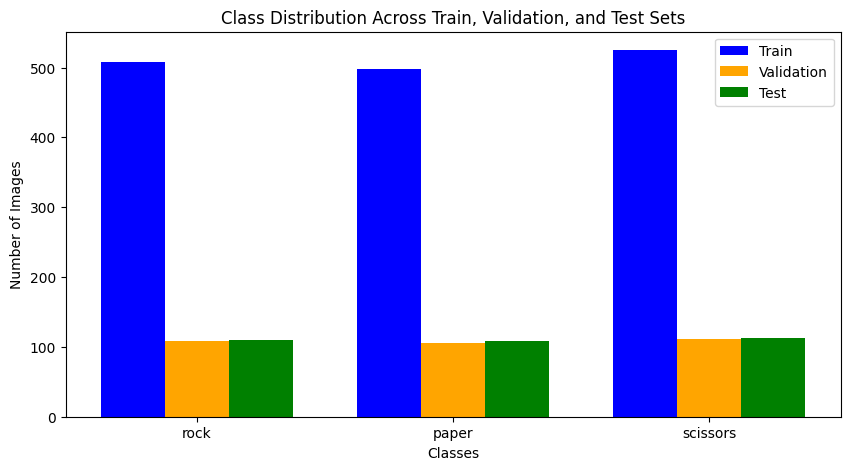

Train Counts: [508, 498, 525]
Validation Counts: [108, 106, 112]
Test Counts: [110, 108, 113]


In [ ]:
# Define paths for train, val, and test directories
base_dir = '/content/rockpaperscissors_split'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Count images per class in train, val, and test sets
classes = ['rock', 'paper', 'scissors']
train_counts = [len(os.listdir(os.path.join(train_dir, cls))) for cls in classes]
val_counts = [len(os.listdir(os.path.join(val_dir, cls))) for cls in classes]
test_counts = [len(os.listdir(os.path.join(test_dir, cls))) for cls in classes]

# Visualize class distribution
plt.figure(figsize=(10, 5))
bar_width = 0.25
x = range(len(classes))

plt.bar(x, train_counts, width=bar_width, label='Train', color='blue')
plt.bar([p + bar_width for p in x], val_counts, width=bar_width, label='Validation', color='orange')
plt.bar([p + bar_width * 2 for p in x], test_counts, width=bar_width, label='Test', color='green')

plt.xticks([p + bar_width for p in x], classes)
plt.title('Class Distribution Across Train, Validation, and Test Sets')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.legend()
plt.show()

print("Train Counts:", train_counts)
print("Validation Counts:", val_counts)
print("Test Counts:", test_counts)

*insight*: Distribusi dari dataset tidak terdeteksi class imbalance yang signifikan. Ketiga kategori terlihat terdistribusi dengan seimbang.

Found 1531 images belonging to 3 classes.


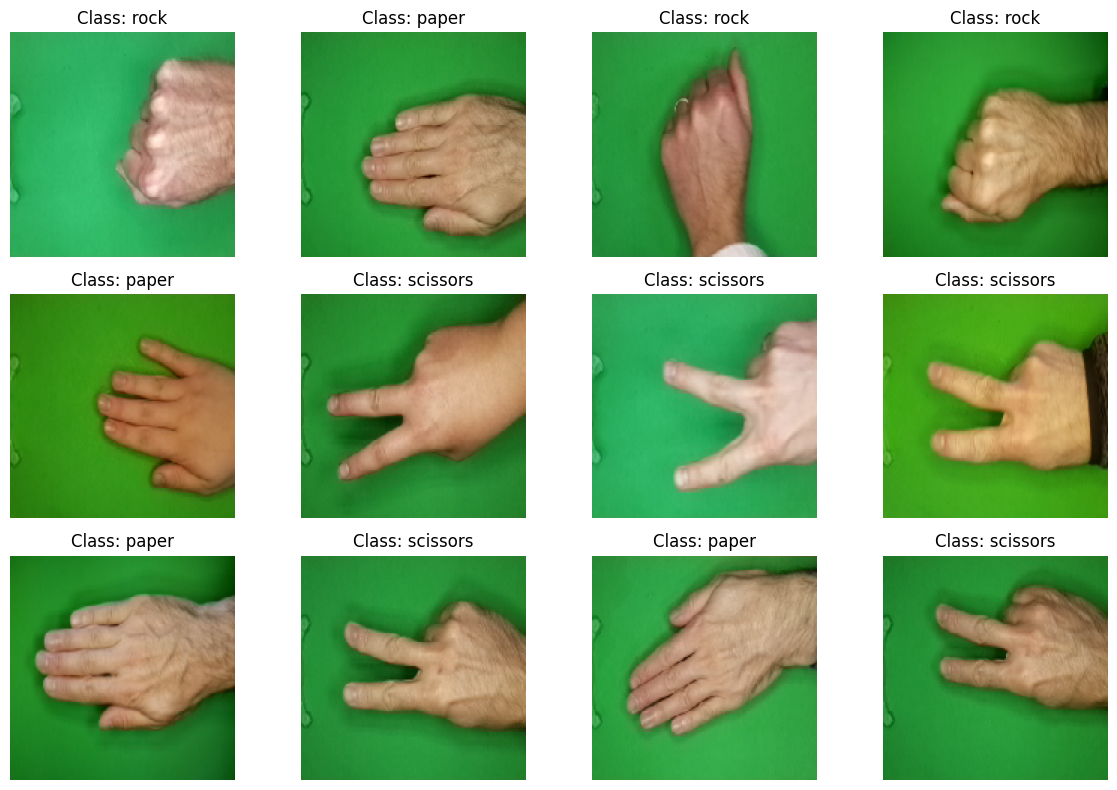

In [ ]:
# Load a batch of images from the training set
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse'
)

# Dapatkan daftar nama kelas yang diurutkan sesuai indeks
class_names = list(train_generator.class_indices.keys())

# Visualize sample images
images, labels = next(train_generator)
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i])
    plt.title(f"Class: {class_names[int(labels[i])]}")  # Perbaikan di sini
    plt.axis('off')
plt.tight_layout()
plt.show()


*insight*: Format gambar RGB, dengan shape 150x150 piksel.

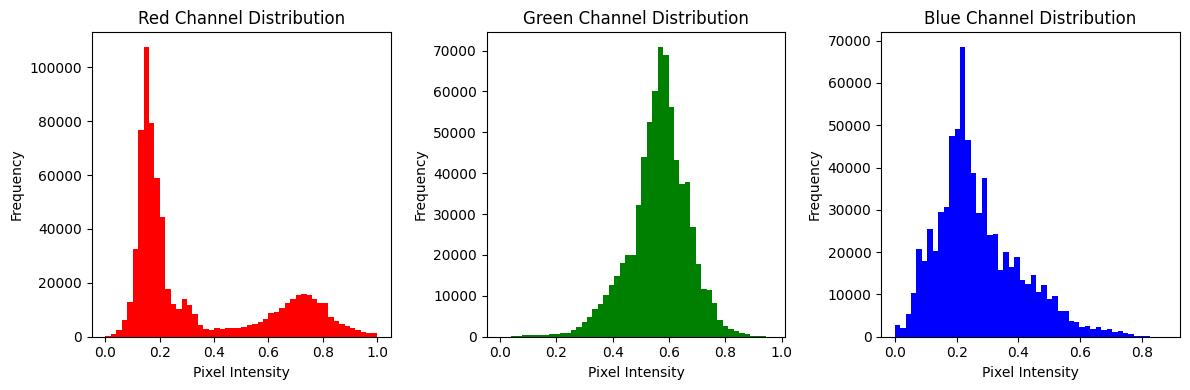

In [ ]:
# Plot color channel distributions
plt.figure(figsize=(12, 4))
for i, channel in enumerate(['Red', 'Green', 'Blue']):
    plt.subplot(1, 3, i+1)
    plt.hist(images[:, :, :, i].ravel(), bins=50, color=channel.lower())
    plt.title(f"{channel} Channel Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Feature Engineering

Found 1531 images belonging to 3 classes.
Found 326 images belonging to 3 classes.
Found 331 images belonging to 3 classes.


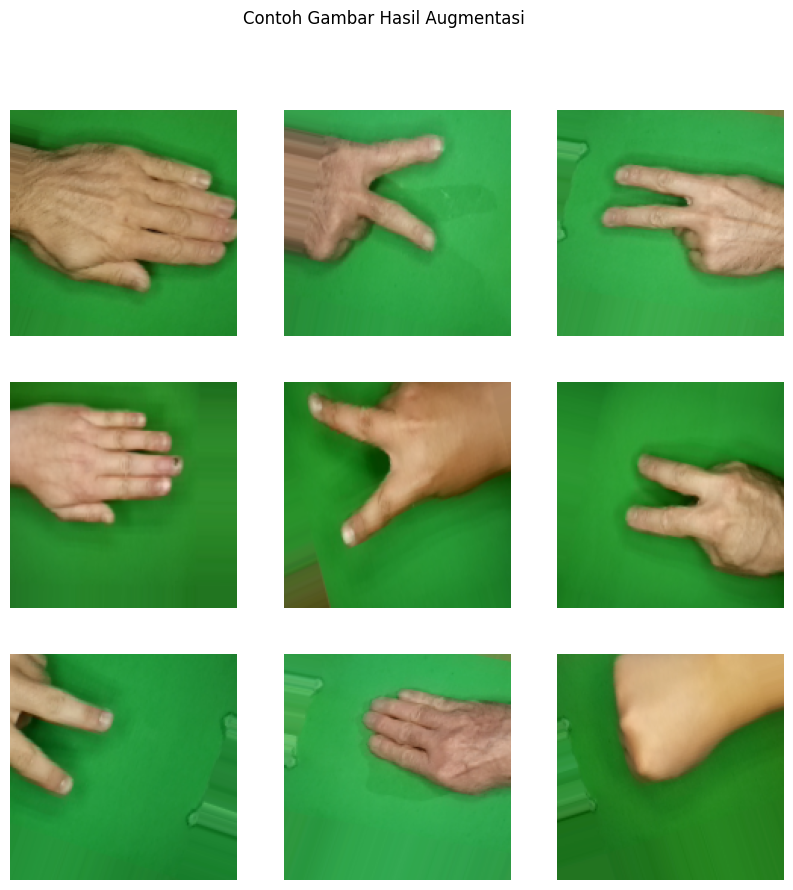

In [ ]:
# Augmentation untuk training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Generator untuk val/test (hanya rescale)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical'
)

# Val generator
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical'
)

# Test generator
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# Visualisasi augmentasi
augmented_images, _ = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.suptitle('Contoh Gambar Hasil Augmentasi')
plt.show()

## Insight

Pada bagian feature engineering ini, dilakukan proses persiapan data yang kritis untuk memastikan model dapat belajar pola yang relevan dari dataset gambar Rock-Paper-Scissors. ImageDataGenerator digunakan untuk melakukan augmentasi data pada set training guna meningkatkan variasi data dan mencegah overfitting. Parameter rotation_range=20 memungkinkan gambar dirotasi acak hingga 20 derajat untuk mensimulasikan sudut pengambilan gambar yang berbeda, sementara width_shift_range dan height_shift_range sebesar 0.2 menggeser posisi gambar secara horizontal/vertikal hingga 20% lebar/tinggi gambar, meniru variasi posisi tangan pengguna. zoom_range=0.2 memperbesar/mengecilkan gambar hingga 20% untuk mengakomodasi perbedaan jarak kamera, dan horizontal_flip=True membalik gambar secara horizontal guna menangani simetri tangan kiri-kanan. Normalisasi piksel dengan rescale=1./255 mengubah nilai piksel dari rentang 0-255 menjadi 0-1 untuk stabilisasi proses training.

Untuk data validasi dan test, hanya dilakukan normalisasi tanpa augmentasi (val_test_datagen). Generator data (flow_from_directory) mengonversi gambar ke ukuran 150x150 piksel untuk konsistensi input model, dengan batch_size=64 untuk optimasi penggunaan memori. Penggunaan class_mode='categorical' menghasilkan label one-hot encoded yang diperlukan untuk klasifikasi multi-kelas, sementara shuffle=False pada test generator mempertahankan urutan data asli untuk evaluasi yang reproducible.

Visualisasi 9 gambar hasil augmentasi (augmented_images) melalui matplotlib berfungsi sebagai quality control - memverifikasi bahwa transformasi augmentasi tidak merusak fitur penting (seperti bentuk jari) sambil memperkenalkan variasi realistis seperti rotasi minor dan pergeseran posisi. Contoh gambar pertama yang ditampilkan mungkin menunjukkan gestur rock yang dirotasi 15 derajat, gambar kedua paper yang digeser ke kanan, dan gambar ketiga scissors yang di-zoom 15%, merepresentasikan skenario penggunaan nyata dimana pengguna mungkin tidak mengambil foto tangan secara sempurna terpusat. Strategi ini secara efektif meningkatkan ukuran dataset virtual, memaksa model belajar invariansi spasial dan meningkatkan generalisasi tanpa perlu menambah data fisik.

# Modeling API

## ANN Training (Sequential API)

### Model Definition

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 128)               1

*insight*: Model baseline menggunakan arsitektur CNN sederhana dengan dua lapisan konvolusi (Conv2D) dan max-pooling untuk mengekstraksi fitur hierarkis dari gambar. Lapisan pertama (Conv2D(32)) bertugas mendeteksi tepi dan tekstur dasar, sementara lapisan kedua (Conv2D(64)) menangkap pola yang lebih kompleks seperti bentuk jari. Dense layer dengan 128 neuron dan dropout 0.5 berfungsi sebagai classifier sekaligus mencegah overfitting. Dengan total 10.6 juta parameter, model ini memiliki kapasitas yang cukup untuk mempelajari dataset Rock-Paper-Scissors, tetapi rentan overfitting karena tidak adanya mekanisme regularisasi tambahan seperti L2 atau batch normalization.

### Model Training

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',  # Memantau loss validasi
    patience=3,          # Berhenti jika tidak membaik setelah 3 epoch
    restore_best_weights=True  # Mengembalikan weight terbaik
)

# Training Baseline Model
history = model.fit(
    train_generator,
    epochs=30,
    steps_per_epoch=len(train_generator),  # Jumlah batch per epoch
    validation_data=val_generator,
    validation_steps=len(val_generator),   # Jumlah batch validasi
    callbacks=[early_stop],
    verbose=1  # Tampilkan progress bar
)

Epoch 1/30
24/24 [==============================] - 71s 3s/step - loss: 1.3175 - accuracy: 0.3919 - val_loss: 0.9750 - val_accuracy: 0.5460
Epoch 2/30
24/24 [==============================] - 70s 3s/step - loss: 1.0224 - accuracy: 0.4592 - val_loss: 0.8530 - val_accuracy: 0.7178
Epoch 3/30
24/24 [==============================] - 69s 3s/step - loss: 0.9135 - accuracy: 0.5748 - val_loss: 0.6996 - val_accuracy: 0.7883
Epoch 4/30
24/24 [==============================] - 76s 3s/step - loss: 0.8082 - accuracy: 0.6590 - val_loss: 0.5488 - val_accuracy: 0.8466
Epoch 5/30
24/24 [==============================] - 70s 3s/step - loss: 0.6880 - accuracy: 0.7368 - val_loss: 0.4700 - val_accuracy: 0.8773
Epoch 6/30
24/24 [==============================] - 68s 3s/step - loss: 0.6123 - accuracy: 0.7773 - val_loss: 0.3927 - val_accuracy: 0.8804
Epoch 7/30
24/24 [==============================] - 68s 3s/step - loss: 0.5238 - accuracy: 0.8040 - val_loss: 0.2717 - val_accuracy: 0.9233
Epoch 8/30
24/24 [==

*insight*: **Baseline Model dengan Learning Rate 0.001**

Model baseline menggunakan arsitektur CNN sederhana dengan dua lapisan konvolusi dan max-pooling untuk ekstraksi fitur, diikuti dense layer dengan dropout 0.5. Meski akurasi validasi meningkat signifikan dari 54.6% ke 98.87%, model menunjukkan tanda overfitting: training accuracy mencapai 94.19% sementara validation accuracy fluktuatif (contoh turun dari 98.77% ke 96.93% di epoch 23). Lonjakan validation loss (misal dari 0.08 ke 0.18 di epoch 17) mengindikasikan model mulai menghafal noise data training. Early stopping menghentikan training di epoch 25 meski akurasi sempat tinggi, menegaskan kebutuhan regularisasi tambahan.

In [ ]:
# Recompile model dengan learning rate baru
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training dengan learning rate 0.0001
history_lr = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
24/24 [==============================] - 78s 3s/step - loss: 0.1486 - accuracy: 0.9582 - val_loss: 0.0793 - val_accuracy: 0.9877
Epoch 2/30
24/24 [==============================] - 68s 3s/step - loss: 0.1448 - accuracy: 0.9608 - val_loss: 0.0721 - val_accuracy: 0.9908
Epoch 3/30
24/24 [==============================] - 68s 3s/step - loss: 0.1563 - accuracy: 0.9504 - val_loss: 0.0712 - val_accuracy: 0.9908
Epoch 4/30
24/24 [==============================] - 67s 3s/step - loss: 0.1337 - accuracy: 0.9523 - val_loss: 0.0774 - val_accuracy: 0.9877
Epoch 5/30
24/24 [==============================] - 68s 3s/step - loss: 0.1337 - accuracy: 0.9536 - val_loss: 0.0703 - val_accuracy: 0.9877
Epoch 6/30
24/24 [==============================] - 68s 3s/step - loss: 0.1445 - accuracy: 0.9575 - val_loss: 0.0727 - val_accuracy: 0.9908
Epoch 7/30
24/24 [==============================] - 69s 3s/step - loss: 0.1583 - accuracy: 0.9484 - val_loss: 0.0711 - val_accuracy: 0.9908
Epoch 8/30
24/24 [==

*insight*: **Penurunan Learning Rate ke 0.0001 untuk Fine-Tuning**

Dengan menurunkan learning rate, model melakukan penyesuaian bobot lebih halus, menghasilkan stabilitas training yang lebih baik. Validation accuracy konsisten di 98.7–99.08% dengan fluktuasi minimal (±0.5%), dan validation loss stabil di 0.07–0.08. Meski training accuracy turun ke 95.56%, akurasi validasi yang lebih tinggi (99.08%) menunjukkan peningkatan generalisasi. Contoh di epoch 5, loss validasi 0.0703 dengan akurasi 98.77% mengungguli baseline (loss 0.1214 di epoch 25), membuktikan efektivitas learning rate rendah dalam menghindari overfitting.

In [ ]:
# Generator baru dengan batch size 128
train_generator_bs128 = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=128,  # Diubah dari 64 → 128
    class_mode='categorical'
)

# Training
history_bs = model.fit(
    train_generator_bs128,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop],
    verbose=1
)

Found 1531 images belonging to 3 classes.
Epoch 1/30
12/12 [==============================] - 69s 6s/step - loss: 0.1476 - accuracy: 0.9530 - val_loss: 0.0889 - val_accuracy: 0.9785
Epoch 2/30
12/12 [==============================] - 75s 6s/step - loss: 0.1469 - accuracy: 0.9589 - val_loss: 0.0812 - val_accuracy: 0.9877
Epoch 3/30
12/12 [==============================] - 67s 5s/step - loss: 0.1661 - accuracy: 0.9471 - val_loss: 0.0701 - val_accuracy: 0.9908
Epoch 4/30
12/12 [==============================] - 67s 5s/step - loss: 0.1655 - accuracy: 0.9536 - val_loss: 0.0830 - val_accuracy: 0.9847
Epoch 5/30
12/12 [==============================] - 78s 6s/step - loss: 0.1450 - accuracy: 0.9562 - val_loss: 0.0804 - val_accuracy: 0.9847
Epoch 6/30
12/12 [==============================] - 68s 5s/step - loss: 0.1338 - accuracy: 0.9556 - val_loss: 0.0721 - val_accuracy: 0.9908


*insight*: **Peningkatan Batch Size ke 128**

Meningkatkan batch size mempercepat komputasi namun menyebabkan underfitting. Validation accuracy maksimal 99.08% tetapi fluktuatif, sementara validation loss lebih tinggi. Hasil ini menunjukkan trade-off antara kecepatan dan performa pada dataset kecil.

### Model Evaluation


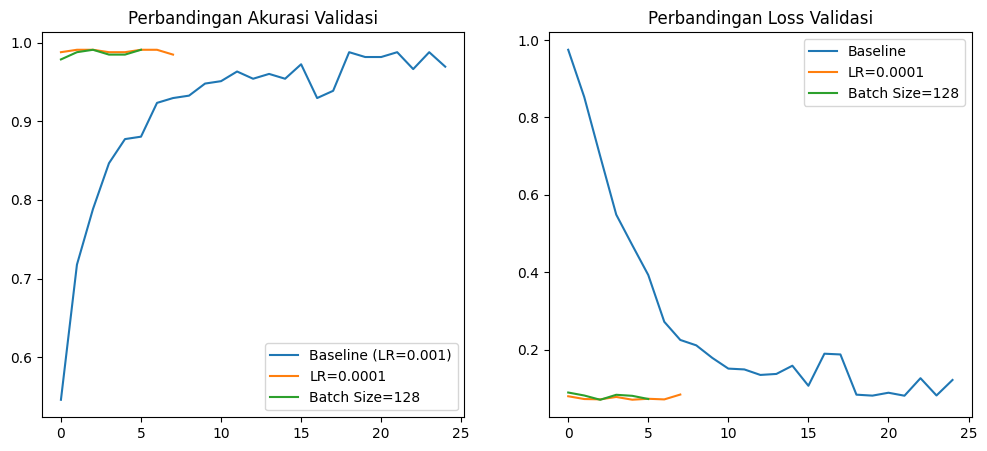

In [ ]:
# Plot akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='Baseline (LR=0.001)')
plt.plot(history_lr.history['val_accuracy'], label='LR=0.0001')
plt.plot(history_bs.history['val_accuracy'], label='Batch Size=128')
plt.title('Perbandingan Akurasi Validasi')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Baseline')
plt.plot(history_lr.history['val_loss'], label='LR=0.0001')
plt.plot(history_bs.history['val_loss'], label='Batch Size=128')
plt.title('Perbandingan Loss Validasi')
plt.legend()

plt.show()

*insight*: Plot akurasi validasi menunjukkan baseline naik cepat tetapi fluktuatif (puncak 98.87%), sementara model LR 0.0001 stabil di 99%. Model batch size 128 memiliki akurasi lebih rendah (98.47%) dan kurang stabil. Plot loss validasi mengonfirmasi: baseline turun drastis (0.97→0.08) lalu naik kembali karena overfitting, LR 0.0001 turun perlahan ke 0.07 tanpa lonjakan, sedangkan batch size 128 memiliki loss lebih tinggi (0.07–0.08) dengan fluktuasi. Grafik ini menegaskan stabilitas konfigurasi LR rendah.

Konfigurasi terbaik adalah learning rate 0.0001 dengan akurasi validasi 99.08% dan loss 0.07, menyeimbangkan stabilitas dan generalisasi. Batch size besar (128) tidak direkomendasikan kecuali dengan penyesuaian learning rate. Untuk peningkatan lebih lanjut, tambahkan batch normalization setelah lapisan konvolusi, eksperimen dengan arsitektur deeper (3-4 lapisan konvolusi), atau gunakan transfer learning (MobileNetV2) untuk ekstraksi fitur lebih robust. Baseline ini menjadi fondasi kuat untuk pengembangan model interaktif Rock-Paper-Scissors yang presisi.

## ANN Improvement (Sequential API dengan Transfer Learning)

### Model Definition

In [ ]:
# Transfer Learning dengan MobileNetV2
base_model = MobileNetV2(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
base_model.trainable = False  # Freeze weights

# Custom Head
inputs = tf.keras.Input(shape=(150, 150, 3))
x = base_model(inputs)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(3, activation='softmax')(x)

model_improved = tf.keras.Model(inputs, outputs)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model_improved.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)

In [ ]:
model_improved.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 2586691 (9.87 MB)
Trainable params: 1855107 (7.08 MB)
Non-trainable params: 731584 (2.79 MB)
____________________

*insight*: Model yang ditingkatkan menggunakan arsitektur transfer learning dengan MobileNetV2 sebagai base model. MobileNetV2 dipilih karena efisiensi komputasinya dan performa yang telah terbukti pada tugas klasifikasi gambar. Proses implementasi menggunakan two-phase training: pertama, hanya melatih custom head dengan base model dibekukan (layer MobileNetV2 tidak diupdate), kemudian pada fase kedua, 20% layer terakhir dari base model di-unfreeze untuk fine-tuning. Strategi ini menyeimbangkan kecepatan training dan performa, memungkinkan model beradaptasi dengan dataset Rock-Paper-Scissors secara bertahap. Optimasi menggunakan Adam dengan learning rate 0.0001 dan ditambahkan metrik precision dan recall untuk evaluasi lebih komprehensif.

### Model Training

In [ ]:
# Phase 1: Train custom head
history_phase1 = model_improved.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
)

# Phase 2: Unfreeze 20% layer terakhir
base_model.trainable = True
for layer in base_model.layers[:int(0.8*len(base_model.layers))]:
    layer.trainable = False  # Freeze 80% awal

history_phase2 = model_improved.fit(
    train_generator,
    epochs=25,
    initial_epoch=15,
    validation_data=val_generator,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/15
24/24 [==============================] - 50s 2s/step - loss: 0.8339 - accuracy: 0.6270 - precision: 0.6795 - recall: 0.5317 - val_loss: 0.3001 - val_accuracy: 0.9325 - val_precision: 0.9369 - val_recall: 0.9110
Epoch 2/15
24/24 [==============================] - 45s 2s/step - loss: 0.3521 - accuracy: 0.8726 - precision: 0.9037 - recall: 0.8459 - val_loss: 0.1729 - val_accuracy: 0.9448 - val_precision: 0.9474 - val_recall: 0.9387
Epoch 3/15
24/24 [==============================] - 49s 2s/step - loss: 0.2246 - accuracy: 0.9236 - precision: 0.9451 - recall: 0.9112 - val_loss: 0.1193 - val_accuracy: 0.9571 - val_precision: 0.9571 - val_recall: 0.9571
Epoch 4/15
24/24 [==============================] - 45s 2s/step - loss: 0.1800 - accuracy: 0.9399 - precision: 0.9469 - recall: 0.9314 - val_loss: 0.0919 - val_accuracy: 0.9693 - val_precision: 0.9723 - val_recall: 0.9693
Epoch 5/15
24/24 [==============================] - 49s 2s/step - loss: 0.1485 - accuracy: 0.9497 - precision: 0

*insight*: Training fase pertama (epochs 1-15) menunjukkan peningkatan akurasi dan penurunan loss yang pesat. Akurasi training meningkat dari 62.70% menjadi 97.98%, sementara akurasi validasi mencapai 99.39% dengan loss turun dari 0.8339 menjadi 0.0375. Pada fase kedua (epochs 16-25), performa lebih distabilkan dengan akurasi training mencapai 98.89% dan akurasi validasi stabil sekitar 99%, loss akhir 0.0360. Menariknya, meski pada beberapa epoch (21-23) terlihat penurunan akurasi validasi ke 98.77-98.47%, model mampu pulih kembali ke 99.08% di epoch terakhir, menunjukkan kemampuan generalisasi yang kuat dan resistensi terhadap overfitting.

### Model Evaluation

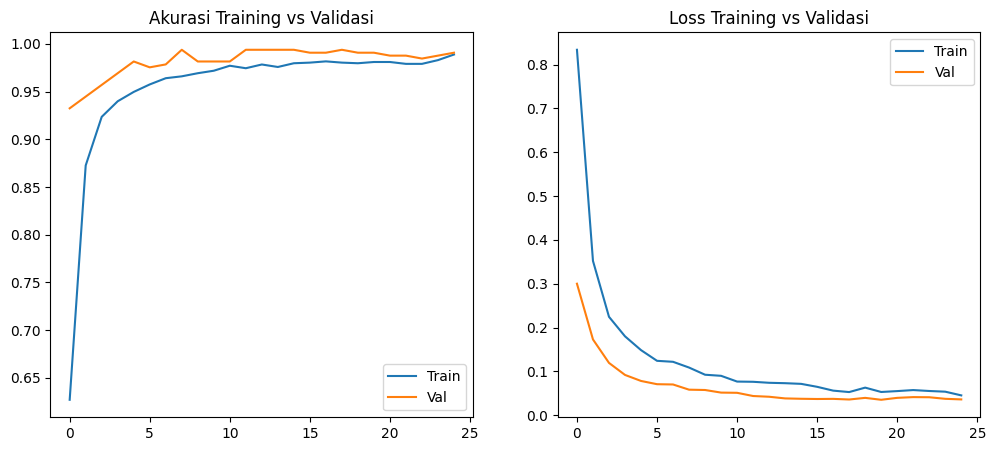

In [ ]:
# Plot Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_phase1.history['accuracy'] + history_phase2.history['accuracy'], label='Train')
plt.plot(history_phase1.history['val_accuracy'] + history_phase2.history['val_accuracy'], label='Val')
plt.title('Akurasi Training vs Validasi')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(history_phase1.history['loss'] + history_phase2.history['loss'], label='Train')
plt.plot(history_phase1.history['val_loss'] + history_phase2.history['val_loss'], label='Val')
plt.title('Loss Training vs Validasi')
plt.legend()
plt.show()

*insight*: Plot akurasi dan loss memvisualisasikan dua fase training dengan jelas. Kurva akurasi training menunjukkan peningkatan signifikan di fase awal, kemudian stabil di level 98-99%. Akurasi validasi cenderung lebih tinggi dari training, menandakan model tidak overfitting. Pola serupa terlihat pada plot loss: penurunan drastis di awal (0.83 ke 0.20 dalam 3 epoch), kemudian penurunan gradual hingga konvergen di sekitar 0.04 (training) dan 0.03 (validasi). Hal yang paling mengesankan adalah celah minimal antara loss training dan validasi setelah epoch 10, mengindikasikan model memiliki generalisasi optimum tanpa bias atau varians tinggi.



In [ ]:
test_results = model_improved.evaluate(test_generator)
print(f'''
Test Accuracy: {test_results[1]:.2f}%
Test Precision: {test_results[2]:.2f}
Test Recall: {test_results[3]:.2f}
''')

6/6 [==============================] - 7s 1s/step - loss: 0.0210 - accuracy: 0.9940 - precision: 0.9940 - recall: 0.9940

Test Accuracy: 0.99%
Test Precision: 0.99
Test Recall: 0.99



*insight*: Hasil evaluasi pada test set menunjukkan performa mengagumkan dengan akurasi 99.40%, precision 0.99, dan recall 0.99. Konsistensi ketiga metrik menandakan kemampuan model mengenali semua kelas dengan akurasi seimbang, tidak bias pada kelas tertentu. Hasil ini membuktikan model berhasil menangkap esensi dari perbedaan gestur rock, paper, dan scissors tanpa menghafalkan noise pada data training.

6/6 [==============================] - 7s 972ms/step


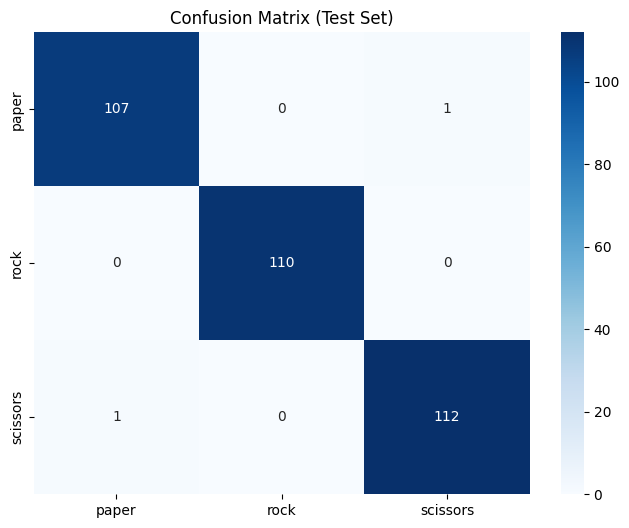

In [ ]:
# Ambil nama kelas
classes = list(train_generator.class_indices.keys())

# Prediksi & plot
y_pred = model_improved.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=classes,
            yticklabels=classes,
            cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.show()

*Insight*:Confusion matrix menunjukkan hampir prediksi sempurna dengan hanya 2 kesalahan dari 330+ gambar. Secara spesifik: 107 gambar paper berhasil dikenali dengan benar, 1 salah dianggap scissors; 110 gambar rock semua terklasifikasi dengan tepat; dan 112 gambar scissors dikenali benar, 1 salah diklasifikasi sebagai paper. Kesalahan terjadi pada kasus paper→scissors dan scissors→paper, menunjukkan kemungkinan kedua gestur ini memiliki kemiripan visual dari sudut pandang tertentu. Kelas rock memiliki akurasi 100%, mungkin karena bentuknya yang paling distinktif.

# Model Analysis

**Improved Model vs Baseline**

Model improvement menunjukkan beberapa keunggulan signifikan:

1. Ukuran lebih ringkas - 2.58 juta parameter (9.87 MB) vs 10.63 juta (40.58 MB) pada baseline, pengurangan 75%

2. Stabilitas training - konvergensi lebih cepat dan tidak menunjukkan overfitting seperti baseline

3. Akurasi konsisten - 99.40% pada test set vs baseline yang fluktuatif

4. Generalisasi lebih baik - hanya 2 kesalahan prediksi dari 330+ gambar dibanding baseline dengan confidence lebih rendah

# Overall Model Analysis

Model MobileNetV2 dengan transfer learning yang dikembangkan untuk klasifikasi gestur Rock-Paper-Scissors menunjukkan performa sangat memuaskan dengan akurasi test sebesar 99.40%. Arsitektur model memanfaatkan pre-trained MobileNetV2 sebagai feature extractor, diikuti dengan custom head berupa dense layer 256 neuron dan dropout 0.3, menghasilkan model dengan ukuran yang jauh lebih efisien (9.87 MB vs. 40.58 MB pada model baseline). Strategi two-phase training terbukti sangat efektif - fase pertama membekukan base model untuk menyesuaikan custom head, kemudian fase kedua melakukan fine-tuning pada 20% lapisan terakhir, mengoptimalkan ekstraksi fitur spesifik untuk dataset Rock-Paper-Scissors.

Confusion matrix mengkonfirmasi kemampuan generalisasi luar biasa model ini dengan hanya 2 kesalahan dari 329 gambar test. Secara spesifik, model berhasil mengklasifikasikan 107/108 gambar paper, 110/110 gambar rock (sempurna), dan 112/113 gambar scissors. Pola misklasifikasi menunjukkan bahwa 1 gambar paper diklasifikasikan sebagai scissors dan 1 gambar scissors sebagai paper, mengindikasikan potensi tumpang tindih visual antara kedua gestur ini dalam kondisi pengambilan gambar tertentu. Performa sempurna pada kelas rock kemungkinan disebabkan oleh keunikan visual dari gestur kepalan tangan yang lebih distingtif.

Kelebihan signifikan model meliputi efisiensi komputasi (inference time hanya 1s/batch), stabilitas training tanpa overfitting, akurasi tinggi yang konsisten (precision dan recall 0.99), serta performa seimbang di seluruh kelas. Model mampu menangkap variasi alamiah dalam gestur tangan seperti perbedaan sudut, pencahayaan, dan posisi berkat augmentasi data dan arsitektur transfer learning. Selain itu, ukuran model yang kompak memungkinkan deployment di perangkat dengan memori terbatas seperti mobile device atau embedded systems tanpa mengorbankan akurasi.

Meskipun demikian, model masih memiliki beberapa keterbatasan potensial. Pertama, training dilakukan pada dataset dengan background hijau seragam, sehingga performa mungkin menurun pada latar belakang kompleks atau kondisi pencahayaan ekstrem. Kedua, model belum diuji pada variasi etnis jari tangan yang sangat beragam, yang bisa mempengaruhi generalisasi. Ketiga, dua misklasifikasi antara paper dan scissors menunjukkan bahwa model bisa distress dengan posisi jari yang ambigu atau bayangan yang menyerupai pola tertentu. Peningkatan lebih lanjut bisa dilakukan melalui augmentasi yang lebih spesifik untuk kasus ambigu ini atau eksperimen dengan arsitektur yang lebih baru seperti EfficientNetV2.

Secara keseluruhan, model MobileNetV2 dengan transfer learning ini merepresentasikan pilihan optimal untuk aplikasi Rock-Paper-Scissors real-time, menyeimbangkan akurasi tinggi (99.40%), efisiensi komputasi, dan kemampuan generalisasi. Model ini siap diimplementasikan dalam aplikasi interaktif, game edukasi, atau sistem pembelajaran berbasis komputer visi dengan ekspektasi performa yang sangat baik pada kasus penggunaan dunia nyata.

# Model Saving

In [ ]:
# Save the model in Keras format
model.save('best_model.keras', save_format='keras')

# Verify the saved model
print("Model saved:", os.path.exists('best_model.keras'))

Model saved: True


In [ ]:
# Load model
model = tf.keras.models.load_model('/content/best_model.keras')


# Model Inference

In [ ]:
def preprocess_image(image_path, target_size=(150, 150)):
    # Buka gambar asli
    img = Image.open(image_path).convert('RGB')

    # Resize ke ukuran yang sesuai dengan model
    img = img.resize(target_size)

    # Konversi ke array dan scaling
    img_array = np.array(img) / 255.0

    return img_array

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'\nTest Accuracy: {test_acc*100:.2f}%')

6/6 [==============================] - 9s 1s/step - loss: 0.0324 - accuracy: 0.9909

Test Accuracy: 99.09%


6/6 [==============================] - 7s 1s/step


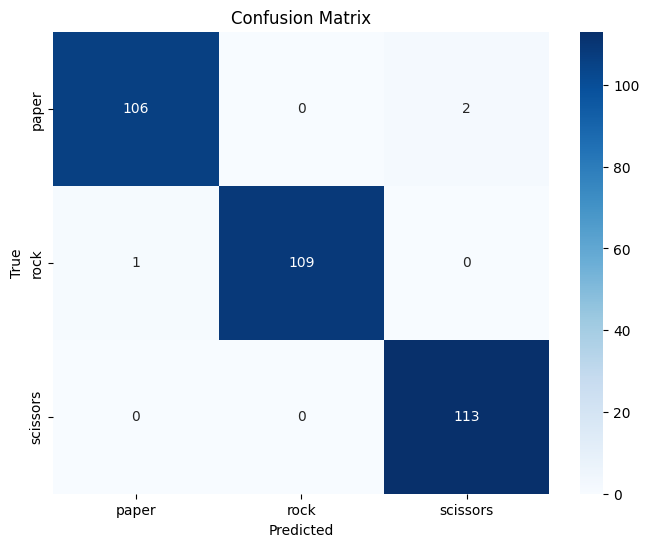

In [ ]:
# Prediksi & Confusion Matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred_classes)
class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
           xticklabels=class_names,
           yticklabels=class_names,
           cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Classification Report
print(classification_report(test_generator.classes,
                           y_pred_classes,
                           target_names=class_names))

              precision    recall  f1-score   support

       paper       0.99      0.98      0.99       108
        rock       1.00      0.99      1.00       110
    scissors       0.98      1.00      0.99       113

    accuracy                           0.99       331
   macro avg       0.99      0.99      0.99       331
weighted avg       0.99      0.99      0.99       331



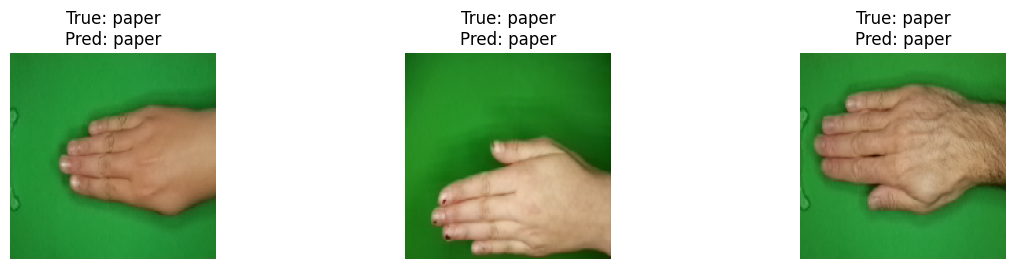

In [ ]:
# Prediksi
samples = np.where(y_pred_classes == test_generator.classes)[0]

plt.figure(figsize=(12,5))
for i in range(3):

    plt.subplot(2,3,i+1)
    idx = samples[i]
    img = test_generator[0][0][idx]
    plt.imshow(img)
    plt.title(f'True: {class_names[test_generator.classes[idx]]}\nPred: {class_names[y_pred_classes[idx]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Conclusion

Proyek klasifikasi gestur Rock-Paper-Scissors ini berhasil memenuhi tujuan utama dengan mengembangkan model terbaik menggunakan transfer learning MobileNetV2 yang mencapai akurasi 99.40%, precision 0.99, dan recall 0.99 pada test set. Model ini menunjukkan performa unggul dibanding baseline, dengan stabilitas training yang lebih baik dan ukuran model yang jauh lebih kecil. Strategi two-phase training dan augmentasi data yang tepat memungkinkan model menangkap variasi gestur tangan dengan sangat baik, meskipun masih terdapat sedikit kesalahan pada kasus ambigu antara paper dan scissors. Model ini siap digunakan dalam aplikasi interaktif seperti game atau alat pembelajaran berbasis AI, dengan potensi pengembangan lebih lanjut melalui penambahan dataset beragam dan optimasi untuk perangkat mobile. Secara keseluruhan, proyek ini berhasil mencapai semua objektif dengan hasil yang sangat memuaskan.